## Web scraping using python and BeautifulSoup

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [3]:
url = "http://www.hubertiming.com/results/2017GPTR10K"
html = urlopen(url)

In [4]:
soup = BeautifulSoup(html, 'lxml')

In [5]:
type(soup)

bs4.BeautifulSoup

In [6]:
# Title of the page
title = soup.title
print(title)

<title>2017 Intel Great Place to Run 10K \ Urban Clash Games Race Results</title>


In [7]:
# print the text of the html
text = soup.get_text()

In [8]:
#print(text)

In [9]:
#links
#soup.find_all('a')
all_links = soup.find_all("a")
for link in all_links:
    print(link.get('href'))

mailto:timing@hubertiming.com
https://www.hubertiming.com/
#individual
#team
/results/2017GPTR
/results/summary/2017GPTR10K
#tabs-1
None
None
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [10]:
# table rows
rows = soup.find_all('tr')

In [11]:
#printing thr first 10 rows
print(rows[:10])

[<tr colspan="2"><b>10K:</b></tr>, <tr><td>Finishers:</td><td>577</td></tr>, <tr><td>Male:</td><td>414</td></tr>, <tr><td>Female:</td><td>163</td></tr>, <tr class="header">
<th>Place</th>
<th>Bib</th>
<th>Name</th>
<th>Gender</th>
<th>City</th>
<th>State</th>
<th>Chip Time</th>
<th>Chip Pace</th>
<th>Gender Place</th>
<th>Age Group</th>
<th>Age Group Place</th>
<th>Time to Start</th>
<th>Gun Time</th>
<th>Team</th>
</tr>, <tr>
<td>1</td>
<td>814</td>
<td>JARED WILSON</td>
<td>M</td>
<td>TIGARD</td>
<td>OR</td>
<td>36:21</td>
<td>5:51</td>
<td>1 of 414</td>
<td>M 36-45</td>
<td>1 of 152</td>
<td>0:03</td>
<td>36:24</td>
<td></td>
</tr>, <tr>
<td>2</td>
<td>573</td>
<td>NATHAN A SUSTERSIC</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>36:42</td>
<td>5:55</td>
<td>2 of 414</td>
<td>M 26-35</td>
<td>1 of 154</td>
<td>0:03</td>
<td>36:45</td>
<td>INTEL TEAM F</td>
</tr>, <tr>
<td>3</td>
<td>687</td>
<td>FRANCISCO MAYA</td>
<td>M</td>
<td>PORTLAND</td>
<td>OR</td>
<td>37:44</td>
<td>6:05<

In [12]:
# Loop iterating through the table rows and printing the cells of the rows
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td>14TH</td>, <td>INTEL TEAM M</td>, <td>04:43:23</td>, <td>00:58:59 - DANIELLE CASILLAS</td>, <td>01:02:06 - RAMYA MERUVA</td>, <td>01:17:06 - PALLAVI J SHINDE</td>, <td>01:25:11 - NALINI MURARI</td>]


bs4.element.ResultSet

In [13]:
# get_text() to remove html tags
str_cells = str(row_td)
cleantext = BeautifulSoup(str_cells, 'lxml').get_text()
print(cleantext)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


## Convert the list to a dataframe

In [14]:
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    cleantext = BeautifulSoup(str_cells, 'lxml').get_text()
    list_rows.append(cleantext)

In [15]:
print(cleantext)
type(cleantext)

[14TH, INTEL TEAM M, 04:43:23, 00:58:59 - DANIELLE CASILLAS, 01:02:06 - RAMYA MERUVA, 01:17:06 - PALLAVI J SHINDE, 01:25:11 - NALINI MURARI]


str

In [16]:
df = pd.DataFrame(list_rows)
df.head()

,0
0,[]
1,"[Finishers:, 577]"
2,"[Male:, 414]"
3,"[Female:, 163]"
4,[]


## Data Manipulation and Cleaning

In [17]:
df1 = df[0].str.split(',',expand = True)
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[],None,None,None,None,None,None,None,None,None,None,None,None,None
1,[Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,[Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,[Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,[],None,None,None,None,None,None,None,None,None,None,None,None,None
5,[1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,[2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,[3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,[4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,[5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [18]:
# Removing the first row
df1 = df1.drop(df.index[[0]])

In [19]:
# Using the strip() method to remove the opening square bracket on column "0."
df1[0] = df1[0].str.strip('[')

In [20]:
df1.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]
10,6,642,JONATHON TRAN,M,PORTLAND,OR,39:49,6:25,6 of 414,M 18-25,1 of 34,0:06,39:55,]


In [21]:
# Table headers as column names
col_labels = soup.find_all('th')

In [22]:
all_header = []
col_str = str(col_labels)
cleantext2 = BeautifulSoup(col_str, 'lxml').get_text()
all_header.append(cleantext2)
print(all_header)

['[Place, Bib, Name, Gender, City, State, Chip Time, Chip Pace, Gender Place, Age Group, Age Group Place, Time to Start, Gun Time, Team]']


In [23]:
# convert the list of headers into a pandas dataframe.
df2 = pd.DataFrame(all_header)
df2.head()

,0
0,"[Place, Bib, Name, Gender, City, State, Chip T..."


In [24]:
# split column "0" into multiple columns at the comma position for all rows.
df3 = df2[0].str.split(',', expand = True)
df3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]


In [25]:
# Concatenating the two dataframes using concat()
frames = [df3, df1]
df4 = pd.concat(frames)
df4.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None


In [26]:
# Assigning the first row as the column names
df5 = df4.rename(columns=df4.iloc[0])
df5.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
1,Finishers:,577],None,None,None,None,None,None,None,None,None,None,None,None
2,Male:,414],None,None,None,None,None,None,None,None,None,None,None,None
3,Female:,163],None,None,None,None,None,None,None,None,None,None,None,None
4,],None,None,None,None,None,None,None,None,None,None,None,None,None


In [27]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 597 entries, 0 to 596
Data columns (total 14 columns):
[Place              597 non-null object
 Bib                596 non-null object
 Name               593 non-null object
 Gender             593 non-null object
 City               593 non-null object
 State              593 non-null object
 Chip Time          593 non-null object
 Chip Pace          578 non-null object
 Gender Place       578 non-null object
 Age Group          578 non-null object
 Age Group Place    578 non-null object
 Time to Start      578 non-null object
 Gun Time           578 non-null object
 Team]              578 non-null object
dtypes: object(14)
memory usage: 70.0+ KB


In [28]:
df5.shape

(597, 14)

In [29]:
# Drop all rows with any missing values
df6 = df5.dropna(axis = 0, how = 'any')

In [30]:
df6.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
0,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]


In [31]:
# Removing the table header being replicated as the first row
df7 = df6.drop(df6.index[0])
df7.head()

,[Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team]
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [32]:
# Renaming columns [place and team]
df7.rename(columns={'[Place': 'Place'},inplace=True)
df7.rename(columns={' Team]': 'Team'},inplace=True)
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,]
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F]
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,]
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,]
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F]


In [33]:
# removing the closing bracket for cells in the "Team" column.
df7['Team'] = df7['Team'].str.strip(']')
df7.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F


## Data Analysis and Data Visualization

Cheking the average finish time (in minutes) for the runners?

In [34]:
#need to convert the column "Chip Time" into minutes
#Convert the column to a list
time_list = df7[' Chip Time'].tolist()
#print(time_list[:50])

In [35]:
# Checking if all chip time has same format - h:m:s
for i in time_list:
    print(i)

 36:21
 36:42
 37:44
 38:34
 39:21
 39:49
 40:04
 40:05
 40:17
 40:21
 40:28
 40:36
 40:43
 41:01
 41:19
 41:43
 41:59
 42:23
 42:29
 42:35
 42:36
 42:37
 42:56
 43:26
 43:27
 43:40
 43:42
 43:43
 43:46
 43:46
 43:47
 43:47
 44:04
 44:05
 44:06
 44:07
 44:23
 44:38
 44:41
 44:42
 44:48
 45:03
 45:05
 45:10
 45:11
 45:11
 45:13
 45:14
 45:15
 45:17
 45:27
 45:28
 45:29
 45:36
 45:36
 45:40
 45:40
 45:49
 45:55
 46:02
 46:13
 46:20
 46:23
 46:26
 46:33
 46:35
 46:41
 46:42
 46:45
 46:46
 46:47
 46:49
 46:49
 46:52
 46:55
 46:56
 47:00
 47:02
 47:05
 47:05
 47:08
 47:09
 47:27
 47:29
 47:31
 47:35
 47:42
 47:45
 47:49
 47:50
 47:55
 47:56
 47:56
 47:58
 47:59
 48:09
 48:13
 48:18
 48:18
 48:20
 48:21
 48:29
 48:30
 48:37
 48:38
 48:39
 48:40
 48:42
 48:43
 48:44
 48:49
 48:56
 49:03
 49:09
 49:12
 49:18
 49:23
 49:26
 49:30
 49:32
 49:35
 49:42
 49:44
 49:44
 49:51
 49:54
 49:58
 50:07
 50:12
 50:15
 50:18
 50:19
 50:22
 50:24
 50:26
 50:29
 50:36
 50:38
 50:39
 50:40
 50:41
 50:43
 50:46

In [36]:
# Since the format is different, first 306 rows' format is "m:s" and the others have "h:m:s" format, the detaframe is split into two 
df8 = df7.head(306)

In [37]:
df8.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F


In [38]:
df8.tail()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
306,302,451,DANIEL S TOZAKI,M,HILLSBORO,OR,59:43,9:38,253 of 414,M 26-35,85 of 154,0:57,1:00:40,
307,303,328,RISHANKA PRABHU,F,HILLSBORO,OR,59:47,9:38,50 of 163,F 26-35,16 of 59,0:20,1:00:07,
308,304,26,KOUNG CHHIM,F,HILLSBORO,OR,59:52,9:39,51 of 163,F 46-55,9 of 22,0:15,1:00:07,
309,305,578,DAVID J DESROCHER,M,PORTLAND,OR,59:53,9:39,254 of 414,M 36-45,92 of 152,0:50,1:00:43,
310,306,71,CHRISTINA HUNTER,F,BEAVERTON,OR,59:55,9:39,52 of 163,F 46-55,10 of 22,0:14,1:00:09,


In [39]:
df7.shape

(577, 14)

In [40]:
# Converting the cip time into minutes
time_list8 = df8[' Chip Time'].tolist()
time_mins8 = []
for i in time_list8:
    m, s = i.split(':')
    min8 = (int(m) *60 + int(s))/60
    time_mins8.append(min8)

In [42]:
# Convert the list back to a Dataframe, adding a new column 'Rnner_mins'
df8['Runner_mins'] = time_mins8
df8.head()

/Users/dipikaboro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F,36.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,,38.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F,39.350000


In [43]:
df9 = df7.tail(271)

In [44]:
df9.head(5)

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team
311,307,716,PRASANNA A GOWDA,M,PORTLAND,OR,1:00:01,9:40,255 of 414,M 36-45,93 of 152,1:06,1:01:07,
312,308,269,STANSLAUS W MWAKALEBELA,M,PORTLAND,OR,1:00:03,9:41,256 of 414,M 36-45,94 of 152,1:14,1:01:17,
313,309,640,ANIL KAZA,M,HILLSBORO,OR,1:00:12,9:42,257 of 414,M 36-45,95 of 152,0:29,1:00:41,
314,310,561,MARIA PATLA,F,FOREST GROVE,OR,1:00:12,9:42,53 of 163,F 36-45,18 of 56,0:37,1:00:49,
315,311,747,LAWRENCE HEYWOOD,M,PORTLAND,OR,1:00:13,9:42,258 of 414,M 46-55,50 of 64,0:55,1:01:08,


In [45]:
time_list9 = df9[' Chip Time'].tolist()
time_mins9 = []
for i in time_list9:
    h, m, s = i.split(':')
    min9 = (int(h) * 3600 + int(m) * 60 + int(s))/60
    time_mins9.append(min9)

In [46]:
# Convert the list back to a Dataframe
df9['Runner_mins'] = time_mins9
df9.head()

/Users/dipikaboro/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
311,307,716,PRASANNA A GOWDA,M,PORTLAND,OR,1:00:01,9:40,255 of 414,M 36-45,93 of 152,1:06,1:01:07,,60.016667
312,308,269,STANSLAUS W MWAKALEBELA,M,PORTLAND,OR,1:00:03,9:41,256 of 414,M 36-45,94 of 152,1:14,1:01:17,,60.050000
313,309,640,ANIL KAZA,M,HILLSBORO,OR,1:00:12,9:42,257 of 414,M 36-45,95 of 152,0:29,1:00:41,,60.200000
314,310,561,MARIA PATLA,F,FOREST GROVE,OR,1:00:12,9:42,53 of 163,F 36-45,18 of 56,0:37,1:00:49,,60.200000
315,311,747,LAWRENCE HEYWOOD,M,PORTLAND,OR,1:00:13,9:42,258 of 414,M 46-55,50 of 64,0:55,1:01:08,,60.216667


In [47]:
df10 = pd.concat([df8, df9], axis=0)

In [48]:
df10.head()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
5,1,814,JARED WILSON,M,TIGARD,OR,36:21,5:51,1 of 414,M 36-45,1 of 152,0:03,36:24,,36.350000
6,2,573,NATHAN A SUSTERSIC,M,PORTLAND,OR,36:42,5:55,2 of 414,M 26-35,1 of 154,0:03,36:45,INTEL TEAM F,36.700000
7,3,687,FRANCISCO MAYA,M,PORTLAND,OR,37:44,6:05,3 of 414,M 46-55,1 of 64,0:04,37:48,,37.733333
8,4,623,PAUL MORROW,M,BEAVERTON,OR,38:34,6:13,4 of 414,M 36-45,2 of 152,0:03,38:37,,38.566667
9,5,569,DEREK G OSBORNE,M,HILLSBORO,OR,39:21,6:20,5 of 414,M 26-35,2 of 154,0:03,39:24,INTEL TEAM F,39.350000


In [49]:
df10.tail()

,Place,Bib,Name,Gender,City,State,Chip Time,Chip Pace,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time,Team,Runner_mins
577,573,273,RACHEL L VANEY,F,OTHER,OR,1:38:17,15:51,160 of 163,F 18-25,21 of 21,0:17,1:38:34,,98.283333
578,574,467,ROHIT B DSOUZA,M,PORTLAND,OR,1:38:31,15:53,414 of 414,M 36-45,152 of 152,2:01,1:40:32,INTEL TEAM I,98.516667
579,575,471,CENITA D'SOUZA,F,PORTLAND,OR,1:38:32,15:53,161 of 163,F 46-55,22 of 22,2:02,1:40:34,,98.533333
580,576,338,PRANAVI APPANA,F,HILLSBORO,OR,1:40:47,16:15,162 of 163,F 26-35,59 of 59,1:14,1:42:01,,100.783333
581,577,443,LIBBY B MITCHELL,F,HILLSBORO,OR,1:41:18,16:20,163 of 163,F 36-45,56 of 56,0:52,1:42:10,,101.300000


In [50]:
df10.shape

(577, 15)

In [51]:
# Finally the Dataframe with runner mins column for all rows is created!!
df10.describe()

,Runner_mins
count,577.000000
mean,60.035933
std,11.970623
min,36.350000
25%,51.000000
50%,59.016667
75%,67.266667
max,101.300000


### The average chip time for all runners is ~60 minutes.
### The fastest runner finished in ~36 minutes
### The slowest runner finished in ~ 101 minutes

In [53]:
# Import rcParams from the pylab module to set the same size for all figures to avoid doing it for each figure
from pylab import rcParams
rcParams['figure.figsize'] = 15, 5

([<matplotlib.axis.XTick at 0x1a1797d400>],
 <a list of 1 Text xticklabel objects>)

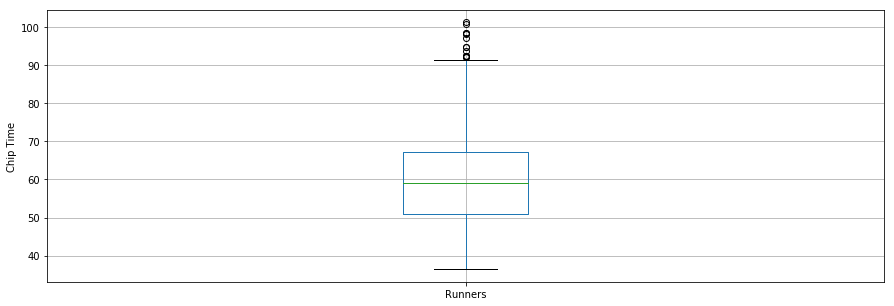

In [54]:
df10.boxplot(column='Runner_mins')
plt.grid(True, axis='y')
plt.ylabel('Chip Time')
plt.xticks([1], ['Runners'])

Checking whether the runners' finish time follows a normal distribution

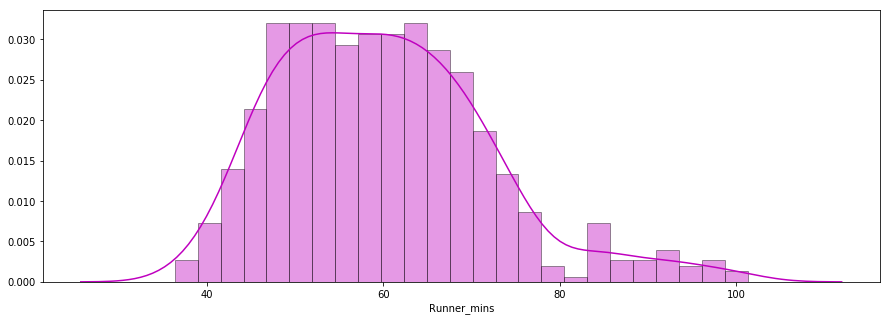

In [55]:
#distribution plot of runners' chip times plotted using the seaborn library.
x = df10['Runner_mins']
ax = sns.distplot(x, hist=True, kde=True, rug=False, color='m', bins=25, hist_kws={'edgecolor':'black'})
plt.show()

### the distribution looks almost normal

Checking whether there were any performance differences between males and females of various age groups.

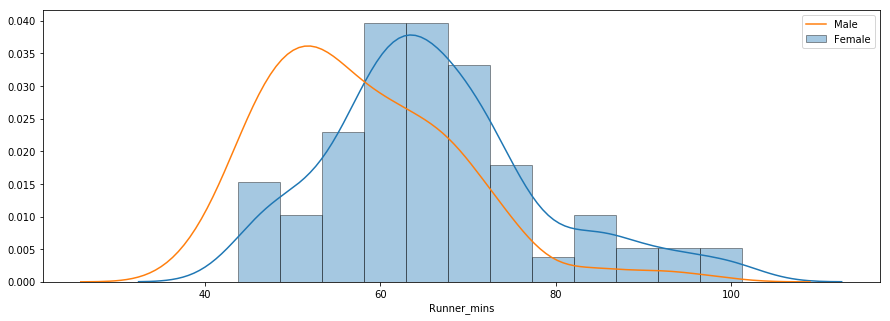

In [56]:
f_fuko = df10.loc[df10[' Gender']==' F']['Runner_mins']
m_fuko = df10.loc[df10[' Gender']==' M']['Runner_mins']
sns.distplot(f_fuko, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(m_fuko, hist=False, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

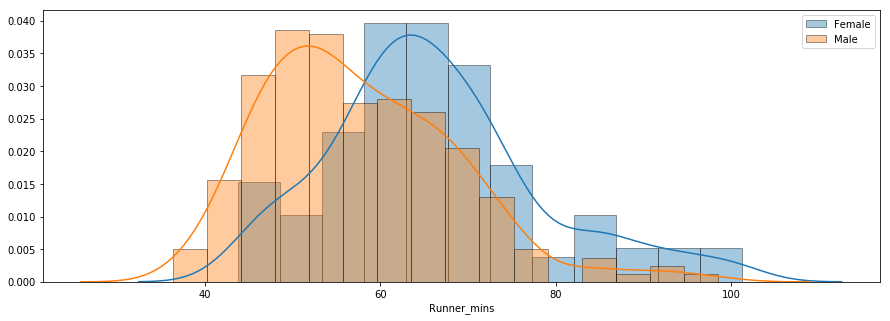

In [57]:
female = df10.loc[df10[' Gender']==' F']['Runner_mins']
male = df10.loc[df10[' Gender']==' M']['Runner_mins']
sns.distplot(female, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Female')
sns.distplot(male, hist=True, kde=True, rug=False, hist_kws={'edgecolor':'black'}, label='Male')
plt.legend()

## Men took less time than women on average

#### Computing the summary statistics for males and females separately

In [58]:
g_stats = df10.groupby(" Gender", as_index=True).describe()
print(g_stats)

        Runner_mins                                                         \
              count       mean        std        min        25%        50%   
 Gender                                                                      
 F            163.0  66.119223  12.184440  43.766667  58.758333  64.616667   
 M            414.0  57.640821  11.011857  36.350000  49.395833  55.791667   

                                
               75%         max  
 Gender                         
 F       72.058333  101.300000  
 M       64.804167   98.516667  


Text(0.5, 0.98, '')

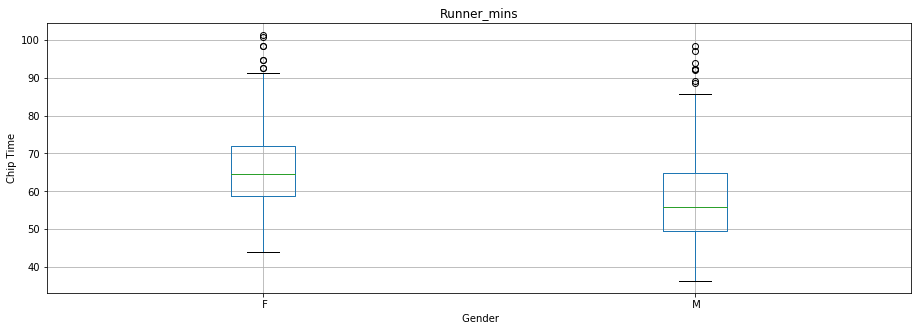

In [59]:
# side-by-side boxplot comparison of male and female finish times
df10.boxplot(column='Runner_mins', by=' Gender')
plt.ylabel('Chip Time')
plt.suptitle("")